## Univariate Analysis - Sri Das

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
states_df = pd.read_csv('states_all.csv')
states_df_orig = pd.read_csv('states_all.csv')

### Filling in missing values with yearly mean

In [3]:
(states_df.isnull().sum()*100/states_df.shape[0]).sort_values(ascending=False)

AVG_READING_8_SCORE             67.230321
AVG_MATH_4_SCORE                67.055394
AVG_MATH_8_SCORE                64.897959
AVG_READING_4_SCORE             62.099125
GRADES_1_8_G                    40.524781
GRADES_9_12_G                   37.551020
ENROLL                          28.629738
OTHER_EXPENDITURE               28.629738
SUPPORT_SERVICES_EXPENDITURE    25.655977
CAPITAL_OUTLAY_EXPENDITURE      25.655977
INSTRUCTION_EXPENDITURE         25.655977
TOTAL_EXPENDITURE               25.655977
LOCAL_REVENUE                   25.655977
STATE_REVENUE                   25.655977
FEDERAL_REVENUE                 25.655977
TOTAL_REVENUE                   25.655977
GRADES_PK_G                     10.087464
GRADES_KG_G                      4.839650
GRADES_4_G                       4.839650
GRADES_8_G                       4.839650
GRADES_12_G                      4.839650
GRADES_ALL_G                     4.839650
STATE                            0.000000
YEAR                             0

In [4]:
# Columns where the missing values are dropped
cols_drop_vals = ['GRADES_KG_G','GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G','GRADES_ALL_G']

# Columns to fill in the missing values with mean (ignoring the year)
cols_fill = ['ENROLL', 'TOTAL_REVENUE','FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE','TOTAL_EXPENDITURE',
             'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 
             'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G','GRADES_1_8_G','GRADES_9_12_G', 'AVG_MATH_4_SCORE', 
             'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE' ]

In [5]:
states_df = states_df.dropna(subset = cols_drop_vals)

In [6]:
(states_df.isnull().sum()*100/states_df.shape[0]).sort_values(ascending=False)

AVG_READING_8_SCORE             70.159314
AVG_MATH_4_SCORE                69.914216
AVG_MATH_8_SCORE                67.647059
AVG_READING_4_SCORE             64.828431
GRADES_1_8_G                    37.500000
GRADES_9_12_G                   34.375000
ENROLL                          25.000000
OTHER_EXPENDITURE               25.000000
SUPPORT_SERVICES_EXPENDITURE    21.875000
CAPITAL_OUTLAY_EXPENDITURE      21.875000
INSTRUCTION_EXPENDITURE         21.875000
TOTAL_EXPENDITURE               21.875000
LOCAL_REVENUE                   21.875000
STATE_REVENUE                   21.875000
FEDERAL_REVENUE                 21.875000
TOTAL_REVENUE                   21.875000
GRADES_PK_G                      5.514706
STATE                            0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_ALL_G                     0.000000
YEAR                             0

In [7]:
means = states_df.groupby('YEAR').mean()
years = list(means.index)

In [8]:
for y in years:
    for i in range(len(states_df)):
        if states_df['YEAR'][i] == y:
            for j in cols_fill:
                states_df[j].fillna(means.loc[y,j], inplace = True)

In [9]:
(states_df.isnull().sum()*100/states_df.shape[0]).sort_values(ascending=False)

PRIMARY_KEY                     0.0
GRADES_PK_G                     0.0
AVG_READING_4_SCORE             0.0
AVG_MATH_8_SCORE                0.0
AVG_MATH_4_SCORE                0.0
GRADES_ALL_G                    0.0
GRADES_9_12_G                   0.0
GRADES_1_8_G                    0.0
GRADES_12_G                     0.0
GRADES_8_G                      0.0
GRADES_4_G                      0.0
GRADES_KG_G                     0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
STATE                           0.0
OTHER_EXPENDITURE               0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
INSTRUCTION_EXPENDITURE         0.0
TOTAL_EXPENDITURE               0.0
LOCAL_REVENUE                   0.0
STATE_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
TOTAL_REVENUE                   0.0
ENROLL                          0.0
YEAR                            0.0
AVG_READING_8_SCORE             0.0
dtype: float64

### 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [10]:
states_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1632.000000,1.632000e+03,1.632000e+03,1.632000e+03,1.632000e+03,1.632000e+03,1.632000e+03,1.632000e+03,1.632000e+03,1.632000e+03,...,1632.000000,1632.000000,1632.000000,1.632000e+03,1.632000e+03,1.632000e+03,1632.000000,1632.000000,1632.000000,1632.000000
mean,2001.500000,8.886698e+05,8.111265e+06,6.648032e+05,3.756618e+06,3.689844e+06,8.210350e+06,4.261821e+06,2.395491e+06,3.845219e+05,...,69166.507966,68106.537377,58420.870711,5.702868e+05,2.716530e+05,9.139695e+05,223.661560,267.806985,216.466095,261.316292
std,9.235923,9.248877e+05,1.056066e+07,1.032242e+06,4.983754e+06,4.916460e+06,1.076522e+07,5.650111e+06,3.016359e+06,4.697351e+05,...,79957.990356,77965.847263,67438.530709,5.342474e+05,2.682491e+05,1.055893e+06,9.615019,9.239845,4.921311,3.914831
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1993.750000,4.306412e+05,2.838817e+06,2.455138e+05,1.510942e+06,1.097890e+06,2.855876e+06,1.483883e+06,8.520340e+05,1.505325e+05,...,18971.500000,19594.250000,16076.500000,3.007590e+05,1.419328e+05,2.480832e+05,218.380952,263.000000,215.333333,260.405405
50%,2001.500000,8.020543e+05,4.572764e+06,2.970296e+05,2.088314e+06,2.187420e+06,4.653591e+06,2.454000e+06,1.370149e+06,2.482348e+05,...,49087.000000,47880.000000,39408.000000,5.575071e+05,2.517678e+05,6.458050e+05,218.380952,263.000000,215.333333,260.405405
75%,2009.250000,8.829410e+05,8.477094e+06,6.959218e+05,3.967106e+06,3.685757e+06,8.674908e+06,4.339454e+06,2.561601e+06,4.264285e+05,...,78504.250000,78976.000000,69397.250000,5.575071e+05,2.628738e+05,1.043420e+06,228.250000,271.000000,215.333333,260.405405
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,278.000000


In [11]:
states_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,802054.333333,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,557507.058824,251767.843137,731634.0,208.000000,252.0,207.000000,260.405405
1,1992_ALASKA,ALASKA,1992,802054.333333,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,557507.058824,251767.843137,122487.0,218.380952,263.0,215.333333,260.405405
2,1992_ARIZONA,ARIZONA,1992,802054.333333,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,557507.058824,251767.843137,673477.0,215.000000,265.0,209.000000,260.405405
3,1992_ARKANSAS,ARKANSAS,1992,802054.333333,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,557507.058824,251767.843137,441490.0,210.000000,256.0,211.000000,260.405405
4,1992_CALIFORNIA,CALIFORNIA,1992,802054.333333,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,557507.058824,251767.843137,5254844.0,208.000000,261.0,202.000000,260.405405


### 2. Choose a state (such as California) and draw a line graph of its total revenues and total expenditures over the years. How do these two variables evolve during these years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [12]:
california = states_df[states_df['STATE'] == 'CALIFORNIA'].sort_values('YEAR')
california.tail()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1075,2013_CALIFORNIA,CALIFORNIA,2013,6.208733e+06,6.886852e+07,7.836263e+06,3.514121e+07,2.589104e+07,6.972712e+07,3.419488e+07,...,470515.0,472381.0,498403.0,3.771067e+06,1952314.0,6312623.0,234.000000,276.0,213.000000,262.000000
1126,2014_CALIFORNIA,CALIFORNIA,2014,6.224685e+06,7.238913e+07,7.415061e+06,3.841055e+07,2.656351e+07,7.250681e+07,3.553942e+07,...,475192.0,467038.0,496901.0,3.767745e+06,1949755.0,6312161.0,218.380952,263.0,215.333333,260.405405
1177,2015_CALIFORNIA,CALIFORNIA,2015,6.226523e+06,7.824804e+07,7.556365e+06,4.236047e+07,2.833121e+07,7.836596e+07,3.895195e+07,...,485885.0,465322.0,492835.0,3.748465e+06,1941009.0,6226737.0,232.000000,275.0,213.000000,259.000000
1228,2016_CALIFORNIA,CALIFORNIA,2016,6.217031e+06,8.921726e+07,7.709079e+06,5.090457e+07,3.060362e+07,8.532013e+07,4.258727e+07,...,471141.0,472340.0,484169.0,3.747077e+06,1939323.0,6309138.0,218.380952,263.0,215.333333,260.405405
1309,2017_CALIFORNIA,CALIFORNIA,2017,8.020543e+05,4.572764e+06,2.970296e+05,2.088314e+06,2.187420e+06,4.653591e+06,2.454000e+06,...,466660.0,474828.0,489221.0,5.575071e+05,1943939.0,6304266.0,232.000000,277.0,215.000000,263.000000


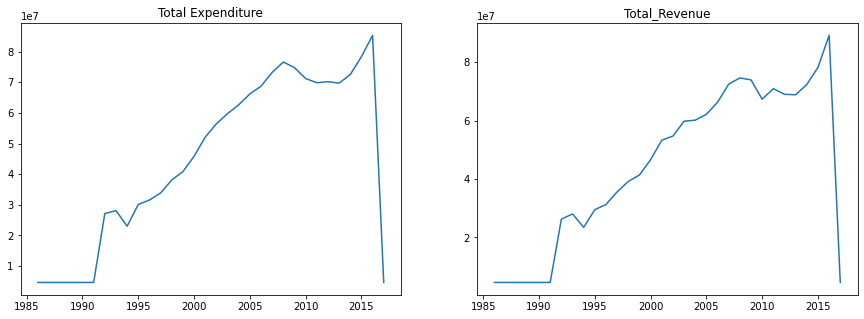

In [13]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(california['YEAR'], california['TOTAL_EXPENDITURE'])
plt.title("Total Expenditure")

plt.subplot(1,2,2)
plt.plot(california['YEAR'], california['TOTAL_REVENUE'])
plt.title("Total_Revenue")
plt.show()

#### From the graphs we can see two main dips in both Total Expenditure and Total Revenue - these dips happened around years 1994 and 2008-2009. These dips correspond to two major recessions that hit California around these times. 

### 3. In your chosen state, in which of the lessons are the students more successful—math or reading?

In [14]:
print('Grade 4 Math scores:', california['AVG_MATH_4_SCORE'].mean())
print('Grade 8 Math scores:', california['AVG_MATH_8_SCORE'].mean())

Grade 4 Math scores: 221.13690476190473
Grade 8 Math scores: 264.90625


In [29]:
print('Grade 4 Reading scores:', california['AVG_READING_4_SCORE'].mean())
print('Grade 8 Reading scores:', california['AVG_READING_8_SCORE'].mean())

Grade 4 Reading scores: 212.42708333333331
Grade 8 Reading scores: 258.59121621621614


From the mean values we can deduce that students are successful in both math and reading, with math scores being marginally better than reading

### 4. What are the distributions of the math and reading scores in the sample?


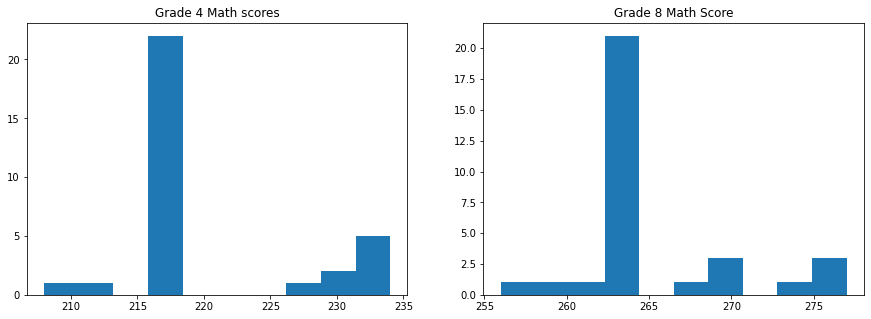

In [16]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.hist(california['AVG_MATH_4_SCORE'])
plt.title("Grade 4 Math scores")
plt.subplot(1,2,2)
plt.hist(california['AVG_MATH_8_SCORE'])
plt.title("Grade 8 Math Score")
plt.show()

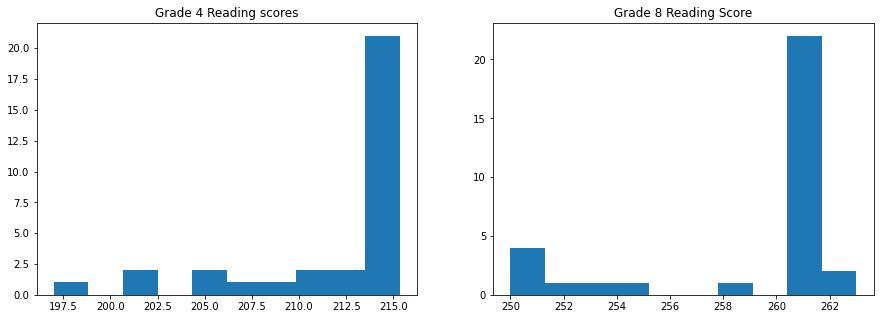

In [17]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.hist(california['AVG_READING_4_SCORE'])
plt.title("Grade 4 Reading scores")
plt.subplot(1,2,2)
plt.hist(california['AVG_READING_8_SCORE'])
plt.title("Grade 8 Reading Score")
plt.show()

### 5. Now, look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then, compare the effects of these techniques on the distributions of the score variables.

In [18]:
# Original data before filling missing values
california_orig = states_df_orig[states_df_orig['STATE'] == 'CALIFORNIA'].sort_values('YEAR')

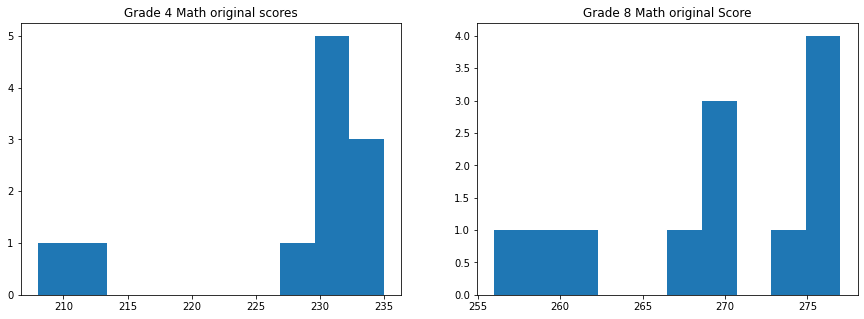

In [19]:
# Plotting Math scores distribution before filling in missing values

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.hist(california_orig['AVG_MATH_4_SCORE'])
plt.title("Grade 4 Math original scores")
plt.subplot(1,2,2)
plt.hist(california_orig['AVG_MATH_8_SCORE'])
plt.title("Grade 8 Math original Score")
plt.show()

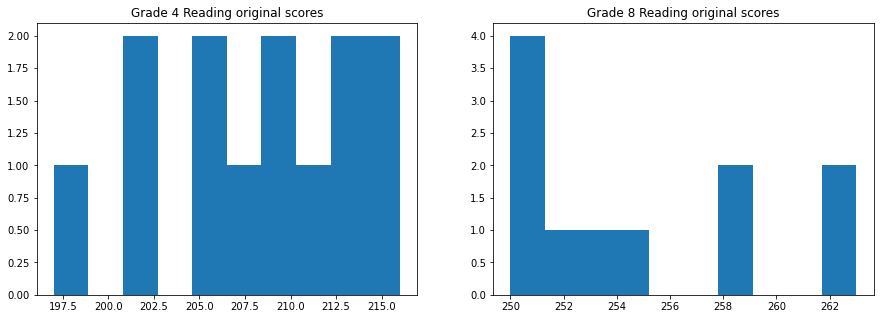

In [20]:
# Plotting Reading scores distribution before filling in missing values

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.hist(california_orig['AVG_READING_4_SCORE'])
plt.title("Grade 4 Reading original scores")
plt.subplot(1,2,2)
plt.hist(california_orig['AVG_READING_8_SCORE'])
plt.title("Grade 8 Reading original scores")
plt.show()

### Filling in Math and Reading missing values with mean, median and linear interpolation

In [21]:
# Filling in Garde 4 math scores missing values using mean, median and interpolation

california_orig['AVG_MATH_4_SCORE_mean']=california_orig['AVG_MATH_4_SCORE'].fillna(california_orig['AVG_MATH_4_SCORE'].mean())
california_orig['AVG_MATH_4_SCORE_median']=california_orig['AVG_MATH_4_SCORE'].fillna(california_orig['AVG_MATH_4_SCORE'].median())
california_orig['AVG_MATH_4_SCORE_inter']=california_orig['AVG_MATH_4_SCORE'].interpolate(method ='linear', limit_direction ='forward')

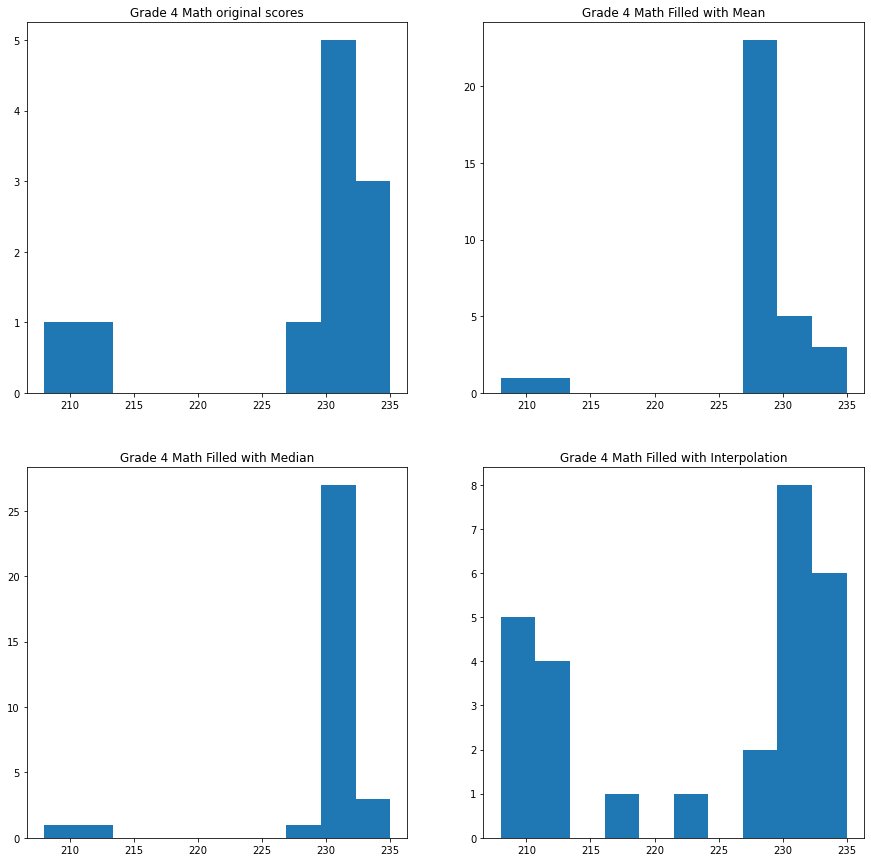

In [22]:
plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.hist(california_orig['AVG_MATH_4_SCORE'])
plt.title("Grade 4 Math original scores")
plt.subplot(2,2,2)
plt.hist(california_orig['AVG_MATH_4_SCORE_mean'])
plt.title("Grade 4 Math Filled with Mean")
plt.subplot(2,2,3)
plt.hist(california_orig['AVG_MATH_4_SCORE_median'])
plt.title("Grade 4 Math Filled with Median")
plt.subplot(2,2,4)
plt.hist(california_orig['AVG_MATH_4_SCORE_inter'])
plt.title("Grade 4 Math Filled with Interpolation")
plt.show()

In [23]:
# Filling in Garde 8 math scores missing values using mean, median and interpolation

california_orig['AVG_MATH_8_SCORE_mean']=california_orig['AVG_MATH_8_SCORE'].fillna(california_orig['AVG_MATH_8_SCORE'].mean())
california_orig['AVG_MATH_8_SCORE_median']=california_orig['AVG_MATH_8_SCORE'].fillna(california_orig['AVG_MATH_8_SCORE'].median())
california_orig['AVG_MATH_8_SCORE_inter']=california_orig['AVG_MATH_8_SCORE'].interpolate(method ='linear', limit_direction ='forward')

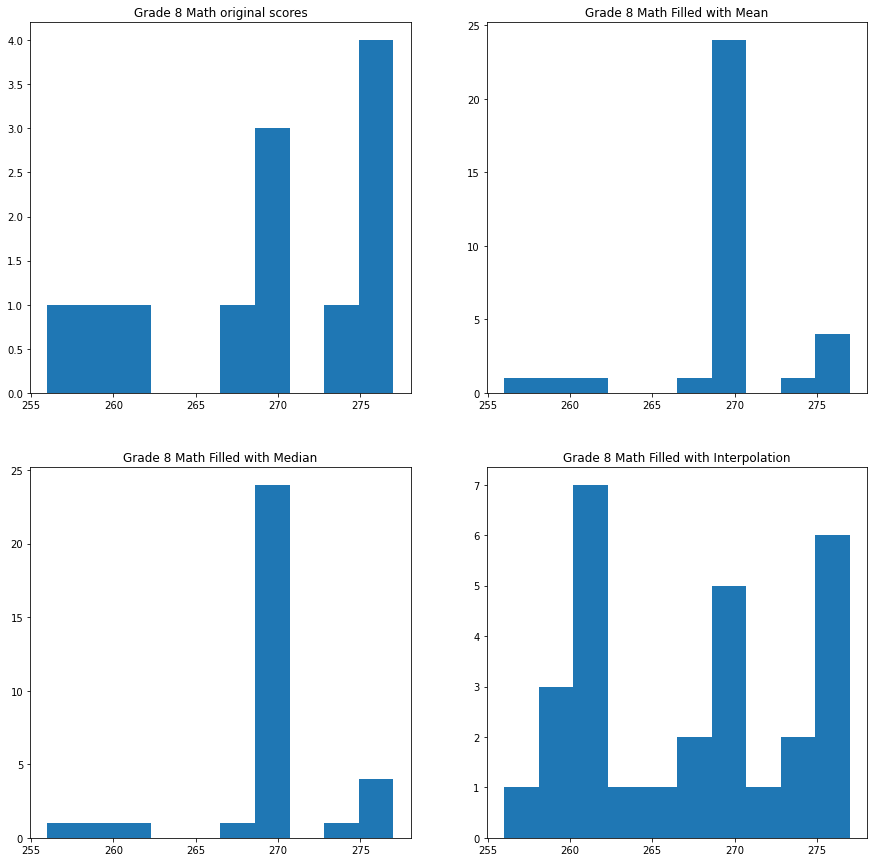

In [24]:
plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.hist(california_orig['AVG_MATH_8_SCORE'])
plt.title("Grade 8 Math original scores")
plt.subplot(2,2,2)
plt.hist(california_orig['AVG_MATH_8_SCORE_mean'])
plt.title("Grade 8 Math Filled with Mean")
plt.subplot(2,2,3)
plt.hist(california_orig['AVG_MATH_8_SCORE_median'])
plt.title("Grade 8 Math Filled with Median")
plt.subplot(2,2,4)
plt.hist(california_orig['AVG_MATH_8_SCORE_inter'])
plt.title("Grade 8 Math Filled with Interpolation")
plt.show()

In [25]:
# Filling in Garde 4 Reading scores missing values using mean, median and interpolation

california_orig['AVG_READING_4_SCORE_mean']=california_orig['AVG_READING_4_SCORE'].fillna(california_orig['AVG_READING_4_SCORE'].mean())
california_orig['AVG_READING_4_SCORE_median']=california_orig['AVG_READING_4_SCORE'].fillna(california_orig['AVG_READING_4_SCORE'].median())
california_orig['AVG_READING_4_SCORE_inter']=california_orig['AVG_READING_4_SCORE'].interpolate(method ='linear', limit_direction ='forward')

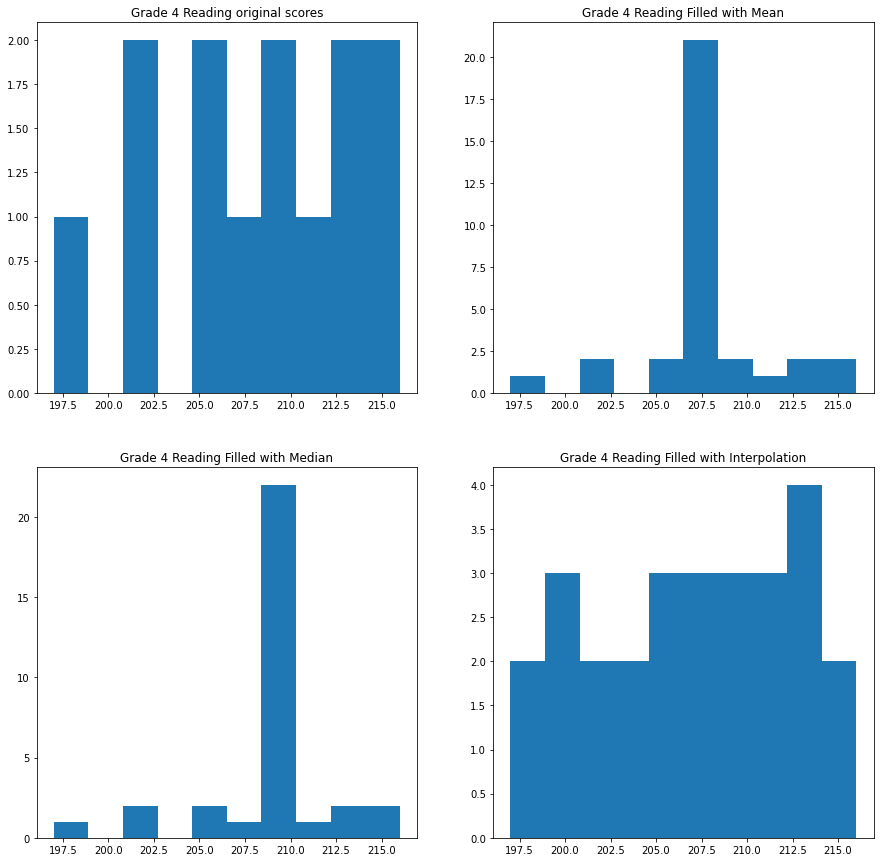

In [26]:
plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.hist(california_orig['AVG_READING_4_SCORE'])
plt.title("Grade 4 Reading original scores")
plt.subplot(2,2,2)
plt.hist(california_orig['AVG_READING_4_SCORE_mean'])
plt.title("Grade 4 Reading Filled with Mean")
plt.subplot(2,2,3)
plt.hist(california_orig['AVG_READING_4_SCORE_median'])
plt.title("Grade 4 Reading Filled with Median")
plt.subplot(2,2,4)
plt.hist(california_orig['AVG_READING_4_SCORE_inter'])
plt.title("Grade 4 Reading Filled with Interpolation")
plt.show()

In [27]:
# Filling in Garde 8 Reading scores missing values using mean, median and interpolation

california_orig['AVG_READING_8_SCORE_mean']=california_orig['AVG_READING_8_SCORE'].fillna(california_orig['AVG_READING_8_SCORE'].mean())
california_orig['AVG_READING_8_SCORE_median']=california_orig['AVG_READING_8_SCORE'].fillna(california_orig['AVG_READING_8_SCORE'].median())
california_orig['AVG_READING_8_SCORE_inter']=california_orig['AVG_READING_8_SCORE'].interpolate(method ='linear', limit_direction ='forward')

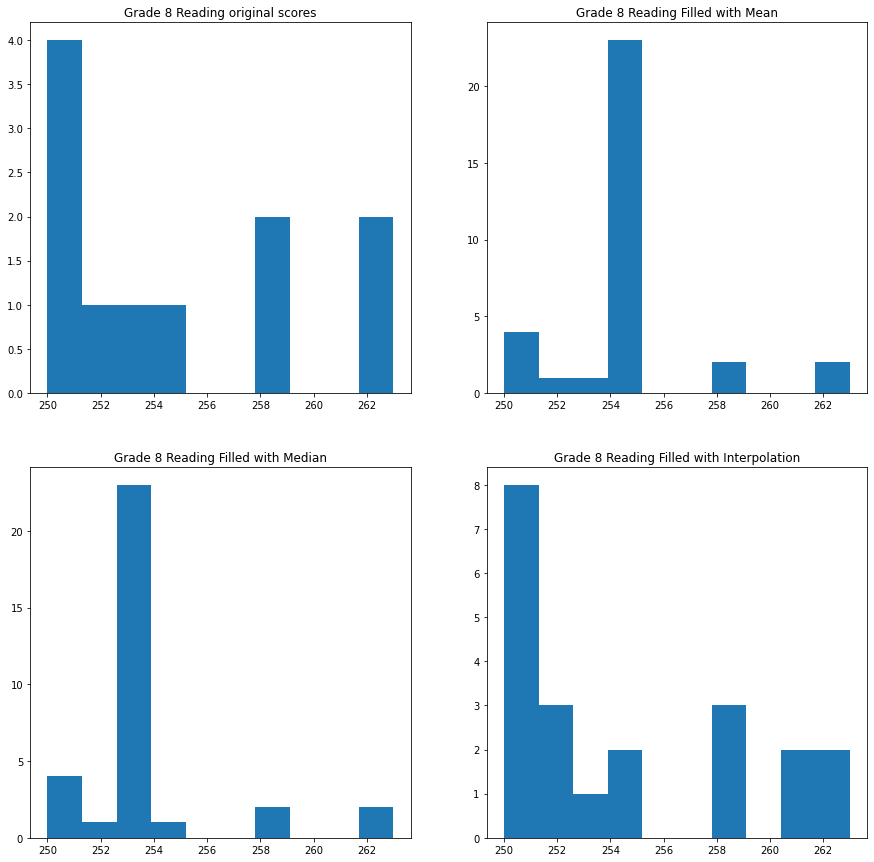

In [28]:
plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.hist(california_orig['AVG_READING_8_SCORE'])
plt.title("Grade 8 Reading original scores")
plt.subplot(2,2,2)
plt.hist(california_orig['AVG_READING_8_SCORE_mean'])
plt.title("Grade 8 Reading Filled with Mean")
plt.subplot(2,2,3)
plt.hist(california_orig['AVG_READING_8_SCORE_median'])
plt.title("Grade 8 Reading Filled with Median")
plt.subplot(2,2,4)
plt.hist(california_orig['AVG_READING_8_SCORE_inter'])
plt.title("Grade 8 Reading Filled with Interpolation")
plt.show()